In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     6.  ]
   [  0.     0.5    0.  ]
   [  0.     1.5    0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     4.5 ]
   [  0.     0.5    0.  ]
   [  0.     1.5    0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     4.5 ]
   [  0.     0.5    0.  ]
   [  0.     1.5    0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [18]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

# Example Model (Modify according to your architecture)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),  # **This was missing!**
    
    Dense(128, activation='relu'),
    Dense(38, activation='softmax')  # Ensure correct num_classes
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Check model architecture again
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 128)     

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 1235s 562ms/step - loss: 1.4462 - accuracy: 0.6524 - val_loss: 0.5657 - val_accuracy: 0.8295
Epoch 2/10
2197/2197 [==============================] - 1112s 506ms/step - loss: 0.4016 - accuracy: 0.8741 - val_loss: 0.4047 - val_accuracy: 0.8852
Epoch 3/10
2197/2197 [==============================] - 955s 434ms/step - loss: 0.2970 - accuracy: 0.9056 - val_loss: 0.5729 - val_accuracy: 0.8433
Epoch 4/10
2197/2197 [==============================] - 966s 440ms/step - loss: 0.2243 - accuracy: 0.9306 - val_loss: 0.5047 - val_accuracy: 0.8768
Epoch 5/10
2197/2197 [==============================] - 1100s 500ms/step - loss: 0.2107 - accuracy: 0.9369 - val_loss: 0.5798 - val_accuracy: 0.8706
Epoch 6/10
2197/2197 [==============================] - 1174s 534ms/step - loss: 0.1878 - accuracy: 0.9475 - val_loss: 0.6825 - val_accuracy: 0.8576
Epoch 7/10
2197/2197 [==============================] - 1167s 531ms/step - loss: 0.1708 - accuracy: 0.9524 -

In [22]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 341s 155ms/step - loss: 0.1349 - accuracy: 0.9712


In [24]:
print(train_loss,train_acc)

0.1348579227924347 0.9711644053459167


In [25]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 85s 155ms/step - loss: 0.9417 - accuracy: 0.8729


In [26]:
print(val_loss,val_acc)

0.941745936870575 0.8728659152984619


In [27]:
model.save("trained_model.keras")

In [28]:
training_history.history

{'loss': [1.4462298154830933,
  0.4015636444091797,
  0.29698410630226135,
  0.22428688406944275,
  0.21072319149971008,
  0.18778802454471588,
  0.1707981377840042,
  0.16270959377288818,
  0.1475067287683487,
  0.15580213069915771],
 'accuracy': [0.6523792743682861,
  0.8741304278373718,
  0.9055551886558533,
  0.9306351542472839,
  0.9368802905082703,
  0.9474784731864929,
  0.9524290561676025,
  0.9558574557304382,
  0.961604654788971,
  0.9599260091781616],
 'val_loss': [0.5657342672348022,
  0.4046856164932251,
  0.5729321837425232,
  0.5047260522842407,
  0.5797924399375916,
  0.6824702024459839,
  0.6893250346183777,
  0.7006577253341675,
  0.80478435754776,
  0.9417462348937988],
 'val_accuracy': [0.8295014500617981,
  0.8851581811904907,
  0.8433303236961365,
  0.8768495321273804,
  0.870589554309845,
  0.8576143980026245,
  0.8685977458953857,
  0.8773617148399353,
  0.8790689706802368,
  0.8728659152984619]}

In [29]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [30]:
training_history.history['val_accuracy']

[0.8295014500617981,
 0.8851581811904907,
 0.8433303236961365,
 0.8768495321273804,
 0.870589554309845,
 0.8576143980026245,
 0.8685977458953857,
 0.8773617148399353,
 0.8790689706802368,
 0.8728659152984619]

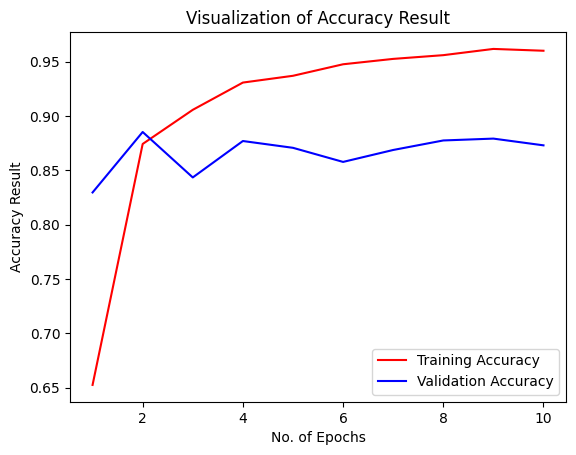

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 84s 152ms/step


(array([[9.9999177e-01, 2.6341340e-12, 6.2589541e-25, ..., 2.5003299e-31,
         8.7634755e-30, 2.5266448e-27],
        [9.9992394e-01, 1.2857225e-10, 9.7927627e-14, ..., 6.7189513e-19,
         6.1807968e-27, 1.3350577e-16],
        [1.0000000e+00, 3.2694872e-19, 5.1077287e-33, ..., 0.0000000e+00,
         1.9314603e-36, 9.6136681e-33],
        ...,
        [1.7272223e-08, 9.5575644e-17, 7.6435164e-11, ..., 1.0476950e-12,
         1.2226369e-15, 9.9213296e-01],
        [2.2977591e-18, 2.7209908e-29, 1.6437615e-21, ..., 1.1483186e-21,
         5.8398547e-22, 1.0000000e+00],
        [3.2593278e-20, 2.0154877e-28, 7.4648850e-21, ..., 6.8101849e-24,
         2.1612542e-14, 9.9438262e-01]], dtype=float32),
 (17572, 38))

In [35]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.84      0.77      0.80       504
                                 Apple___Black_rot       0.80      0.98      0.88       497
                          Apple___Cedar_apple_rust       0.95      0.88      0.91       440
                                   Apple___healthy       0.89      0.81      0.85       502
                               Blueberry___healthy       0.86      0.96      0.91       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.93      0.94       421
                 Cherry_(including_sour)___healthy       0.83      0.97      0.90       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.79      0.84       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.82      0.94      0.

In [41]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[387,  30,   2, ...,   0,   0,   0],
       [  2, 485,   0, ...,   0,   0,   0],
       [  0,   7, 387, ...,   0,   1,   1],
       ...,
       [  0,   0,   0, ..., 464,   2,   0],
       [  0,   0,   0, ...,   1, 409,   1],
       [  8,   0,   0, ...,   0,   0, 414]], dtype=int64)

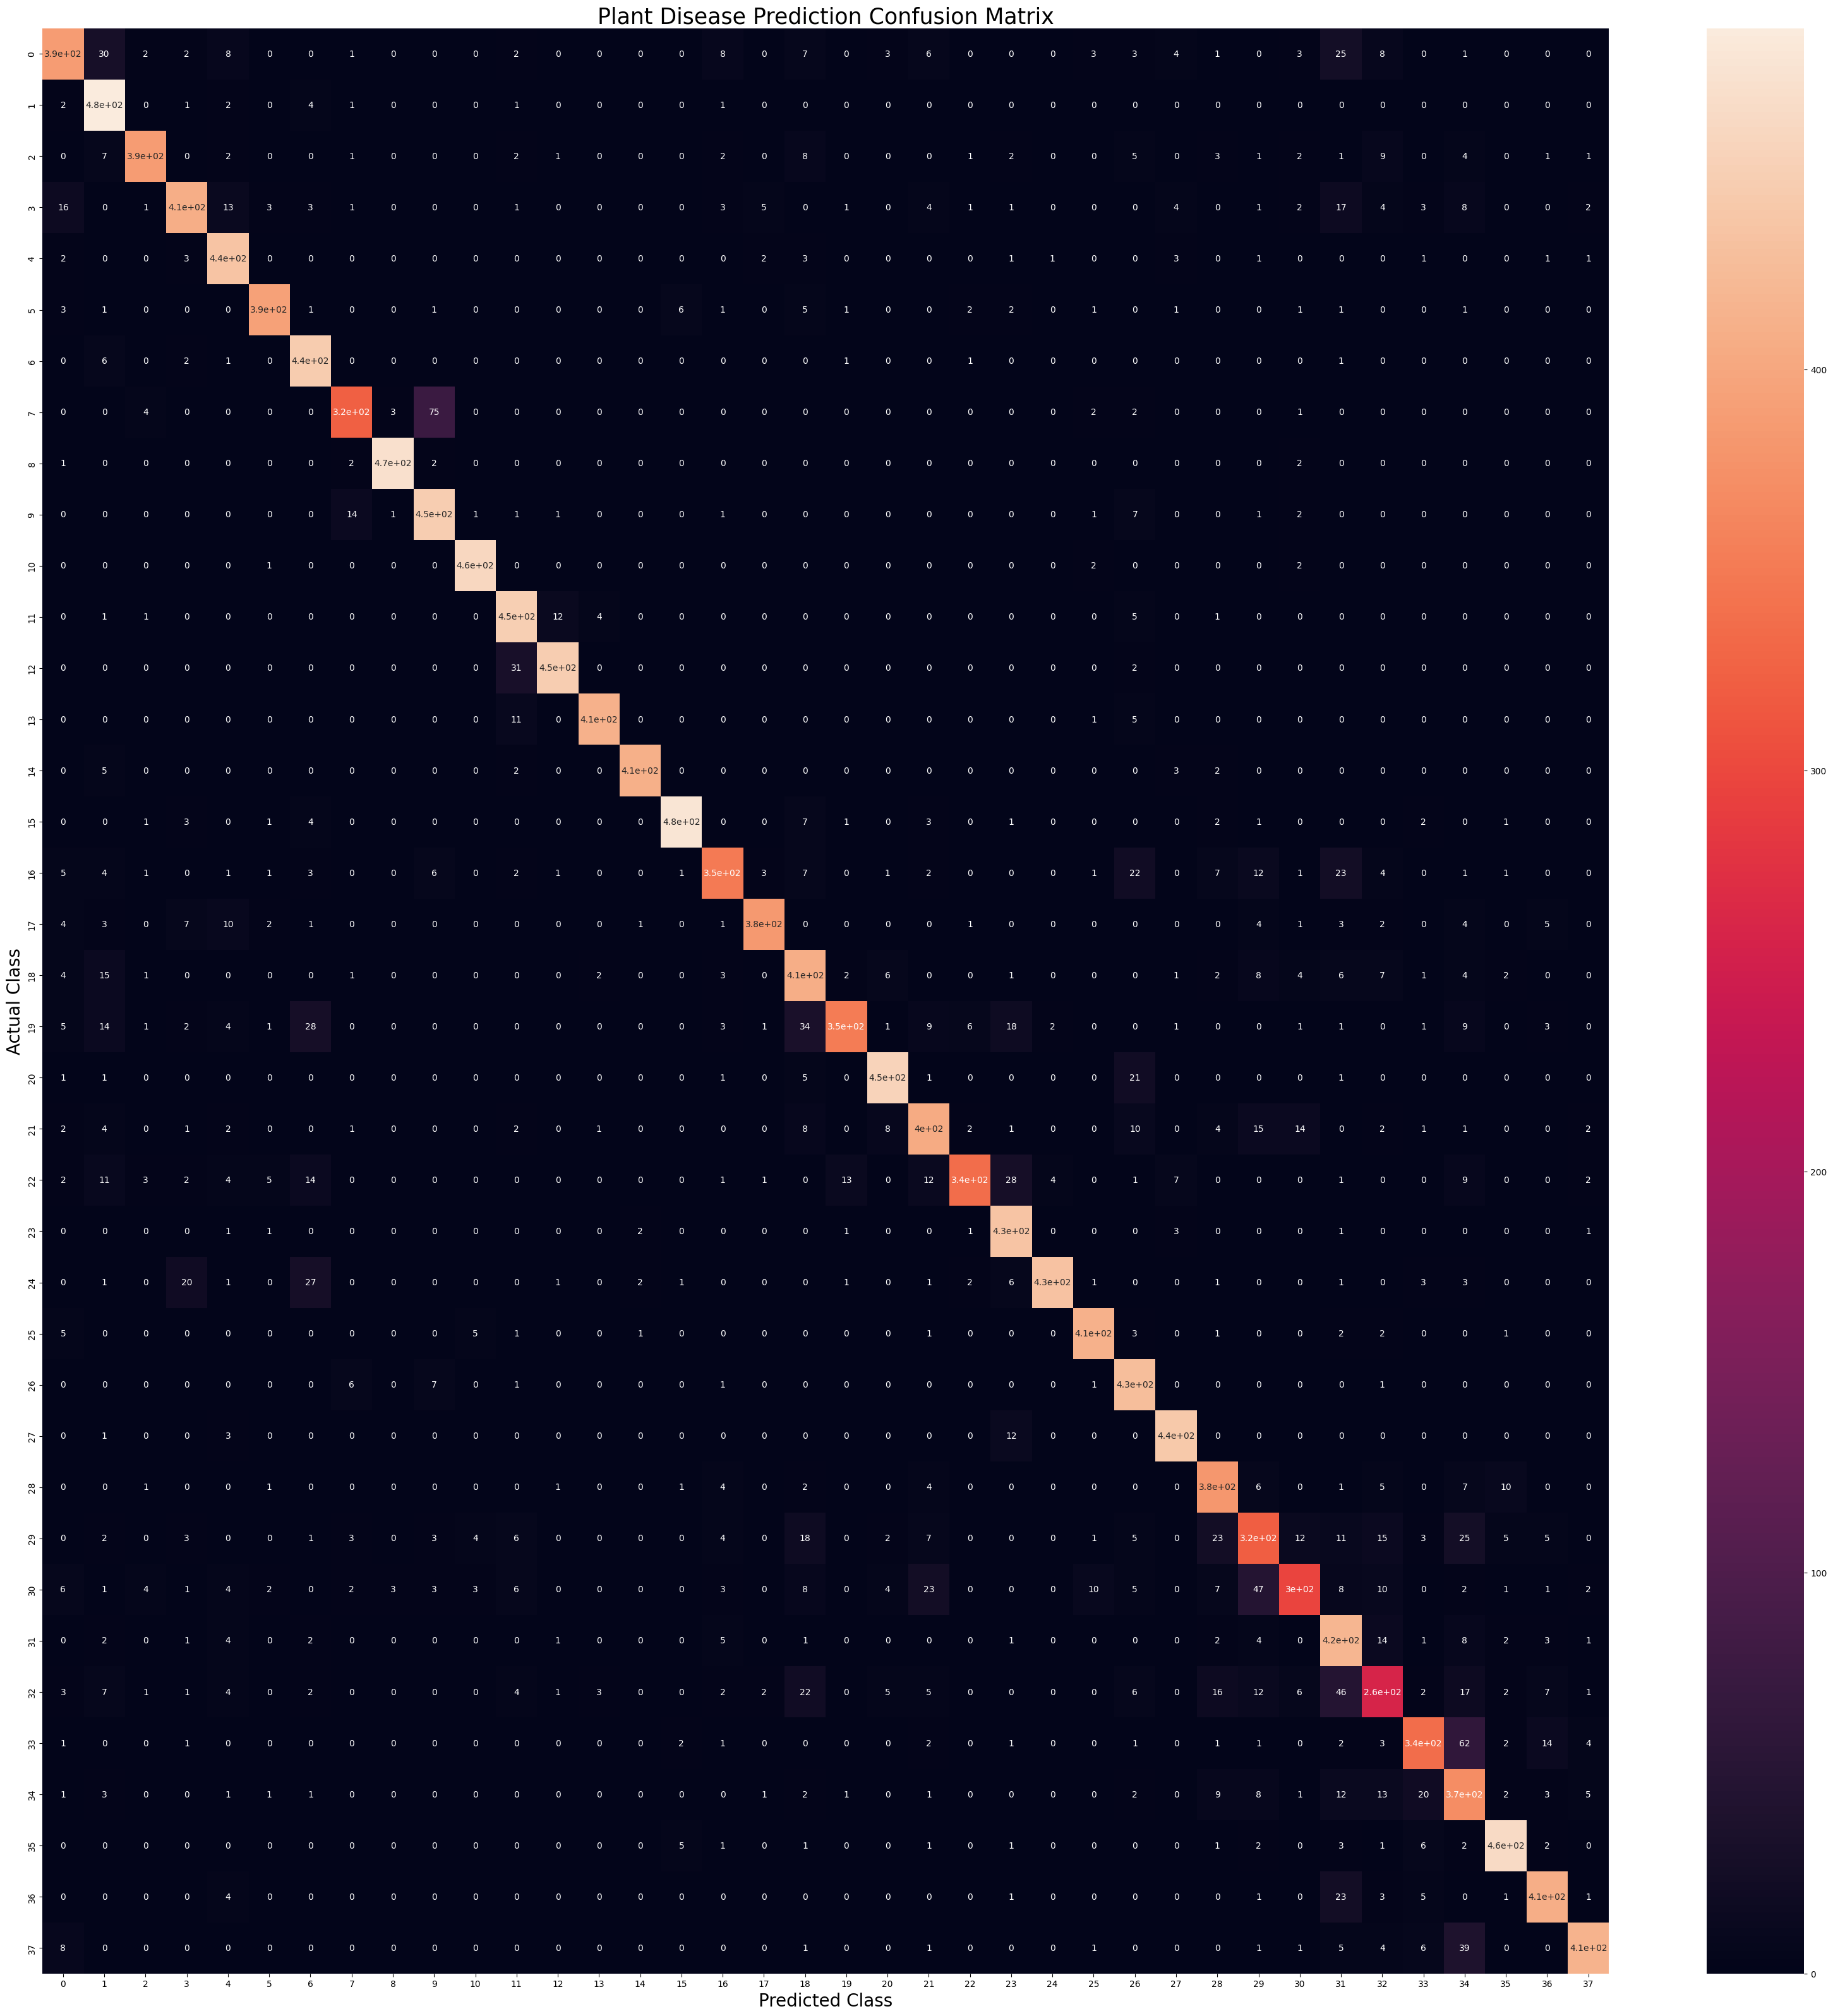

In [42]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()